In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
# end = datetime.now()
# start = datetime(end.year - 1, end.month, end.day)
end = datetime(2023, 1, 31)

start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-17,98.680000,98.889999,95.730003,96.050003,96.050003,72755000,AMAZON
2023-01-18,97.250000,99.320000,95.379997,95.459999,95.459999,79570400,AMAZON
2023-01-19,94.739998,95.440002,92.860001,93.680000,93.680000,69002700,AMAZON
2023-01-20,93.860001,97.349998,93.199997,97.250000,97.250000,67481500,AMAZON
2023-01-23,97.559998,97.779999,95.860001,97.519997,97.519997,76501100,AMAZON
2023-01-24,96.930000,98.089996,96.000000,96.320000,96.320000,66929500,AMAZON
2023-01-25,92.559998,97.239998,91.519997,97.180000,97.180000,94261600,AMAZON
2023-01-26,98.239998,99.489998,96.919998,99.220001,99.220001,68523600,AMAZON
2023-01-27,99.529999,103.489998,99.529999,102.239998,102.239998,87775600,AMAZON


In [3]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,152.117251,154.227052,150.098406,152.240797,151.216581,8.545967e+07
std,13.239204,13.124055,13.268053,13.255593,13.002396,2.257298e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,141.586136,7.027710e+07
50%,150.089996,151.990005,148.199997,150.649994,149.761551,8.100050e+07
75%,163.434998,165.835007,160.879997,163.629997,162.507095,9.374540e+07
max,178.550003,179.610001,176.699997,178.960007,177.397186,1.826020e+08


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-31 to 2023-01-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


1 (251, 7)
2 (251, 7)
3 (251, 7)
4 (251, 7)


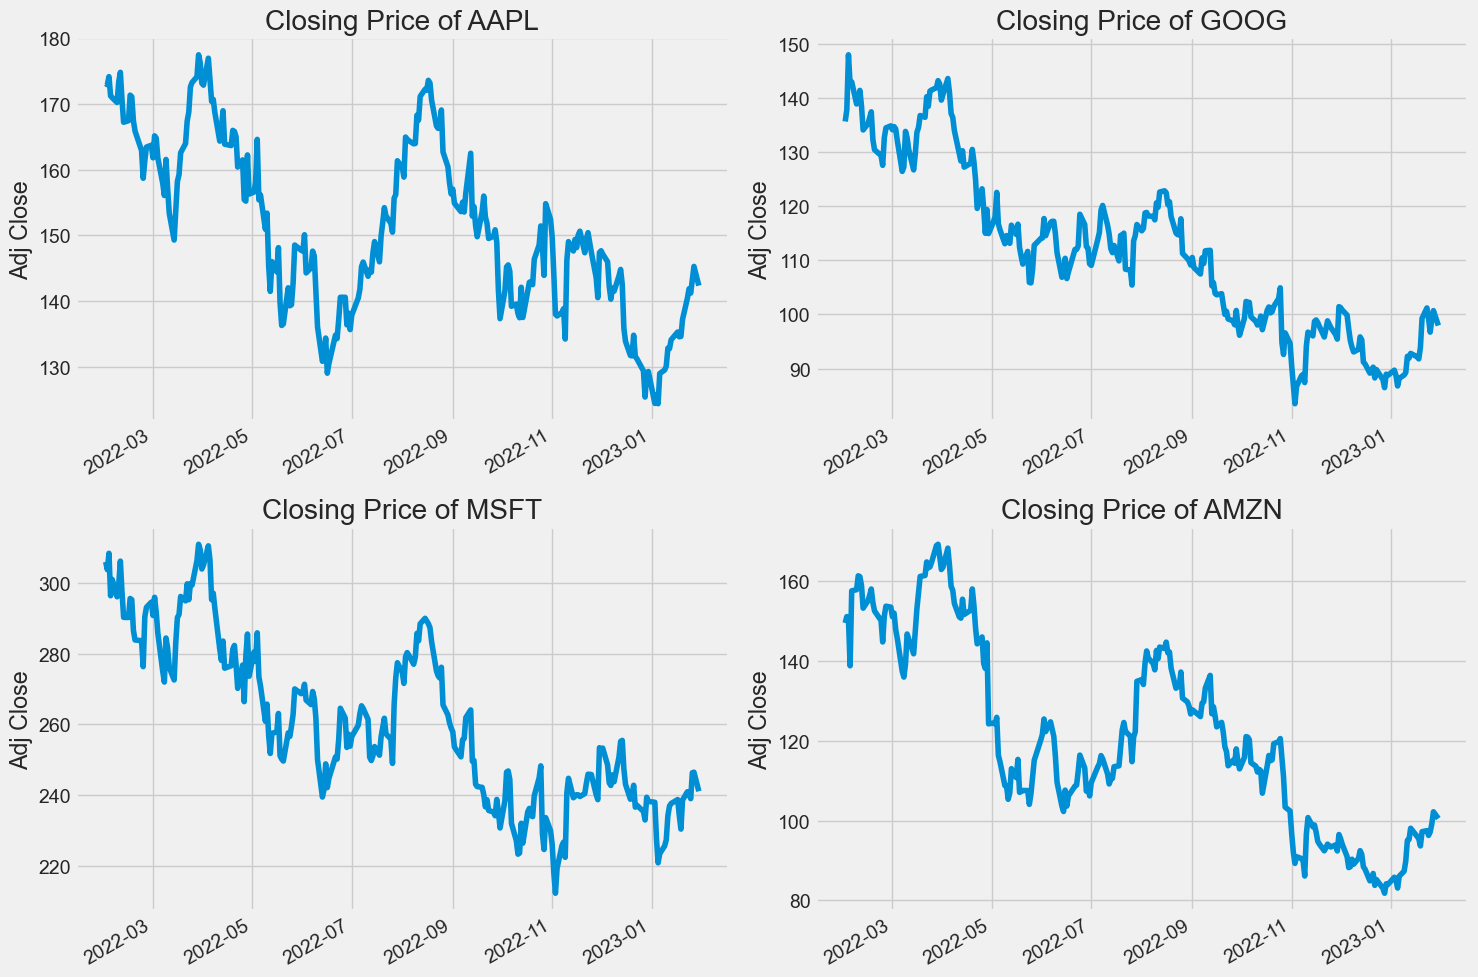

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):#这个1表示起始索引i的开始值
    print(i, company.shape)
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")
    
plt.tight_layout()

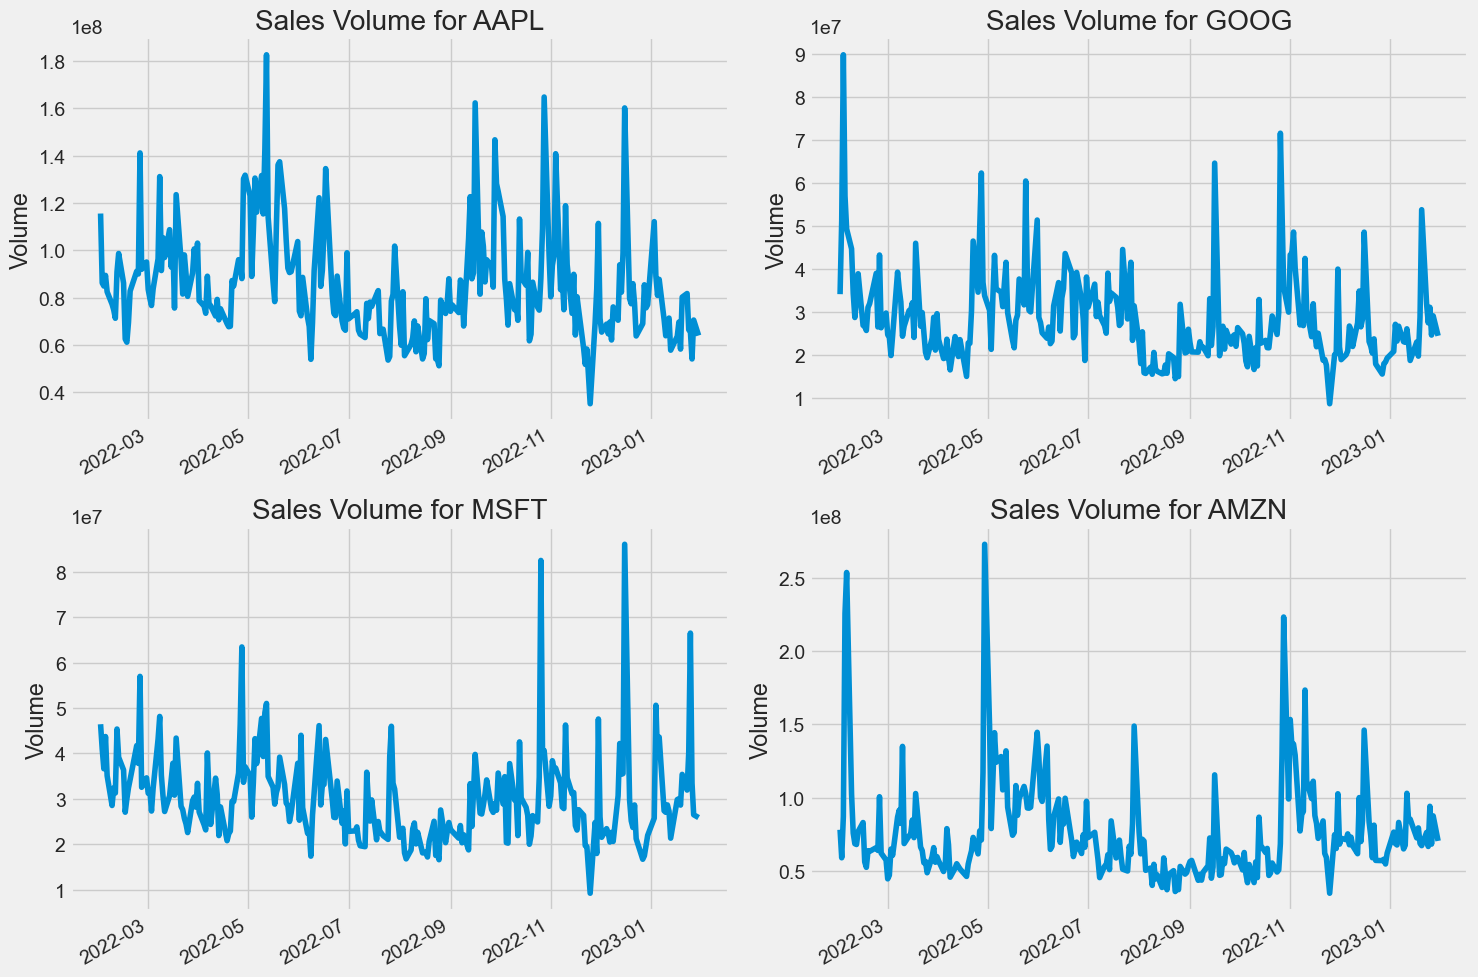

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

移动平均线（MA）是一种简单的技术分析工具，通过创建不断更新的平均价格来平滑价格数据。平均值是在特定的时间段内取得的，如10天，20分钟，30周或交易者选择的任何时间段。

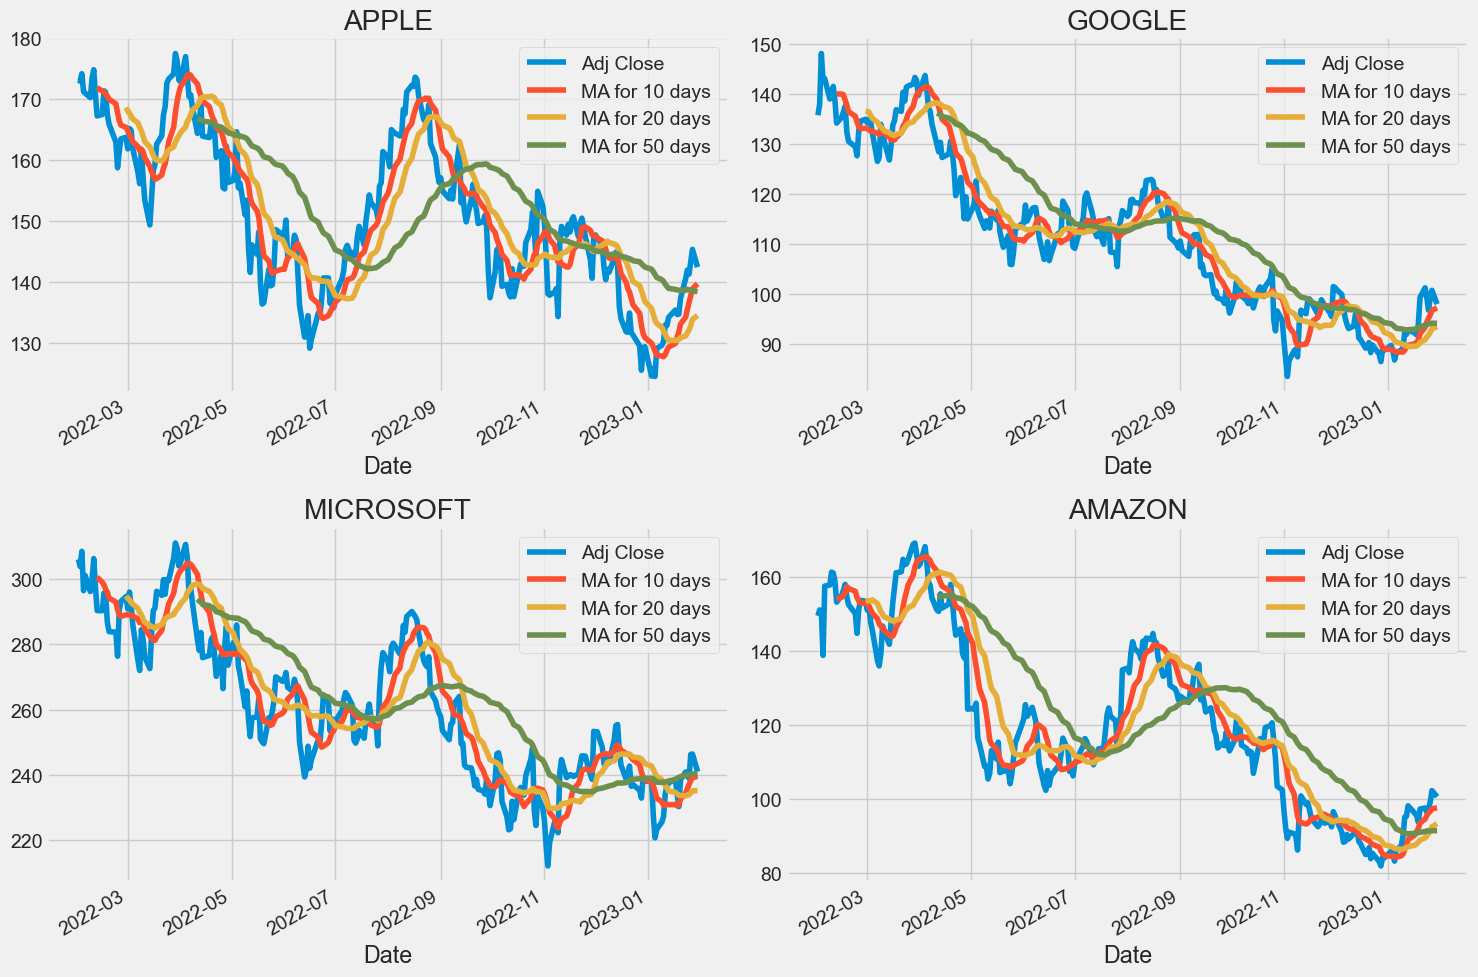

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', f'MA for {ma_day[0]} days', f'MA for {ma_day[1]} days', f'MA for {ma_day[2]} days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', f'MA for {ma_day[0]} days', f'MA for {ma_day[1]} days', f'MA for {ma_day[2]} days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', f'MA for {ma_day[0]} days', f'MA for {ma_day[1]} days', f'MA for {ma_day[2]} days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', f'MA for {ma_day[0]} days', f'MA for {ma_day[1]} days', f'MA for {ma_day[2]} days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

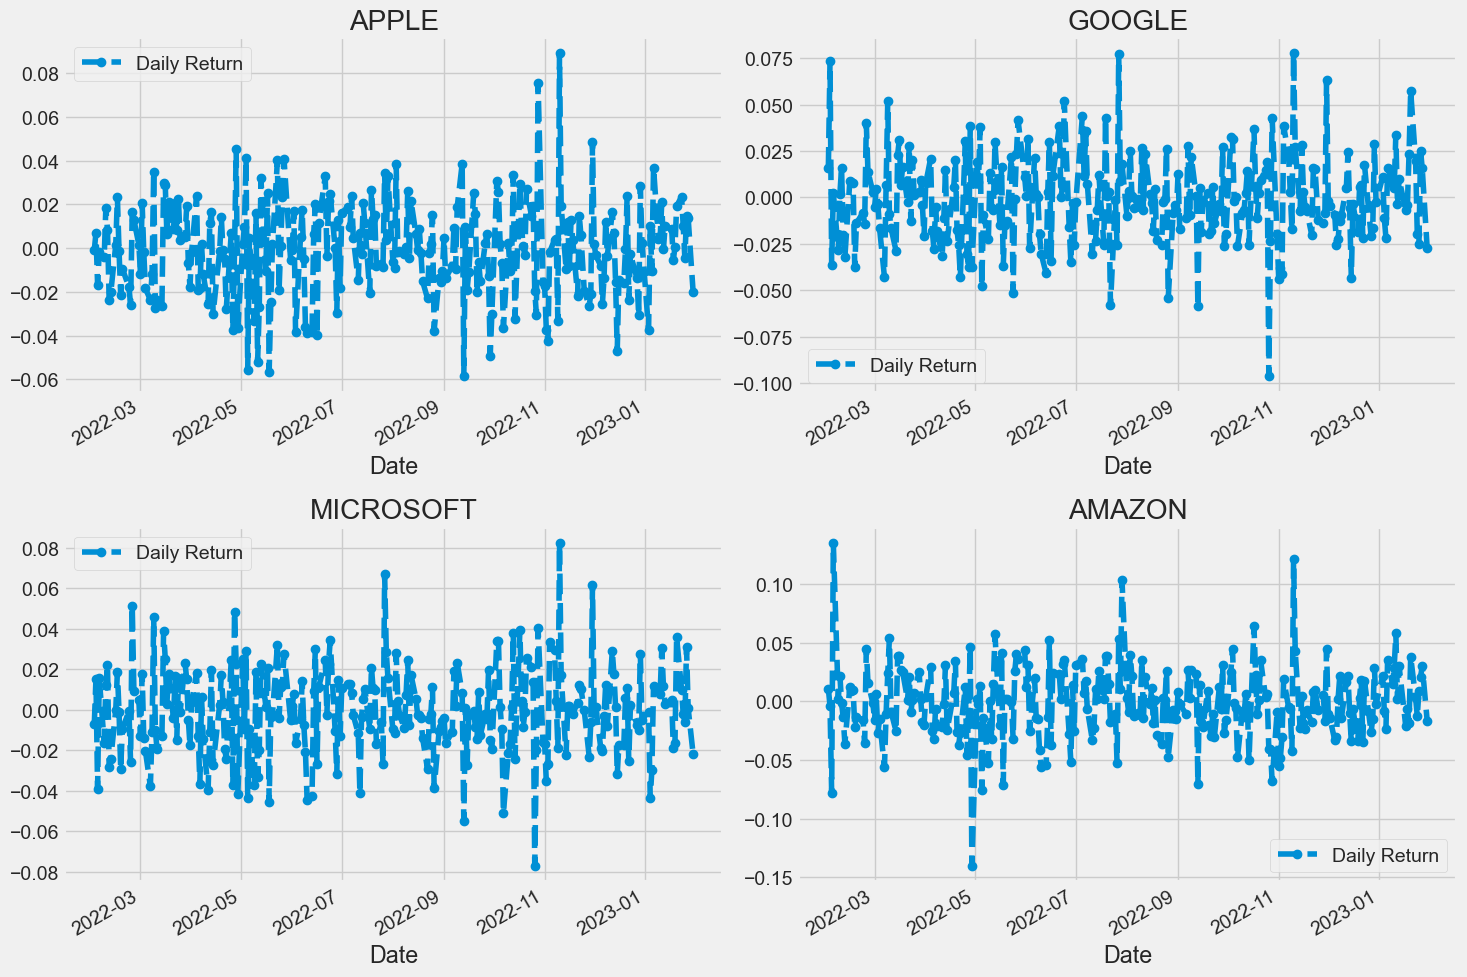

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

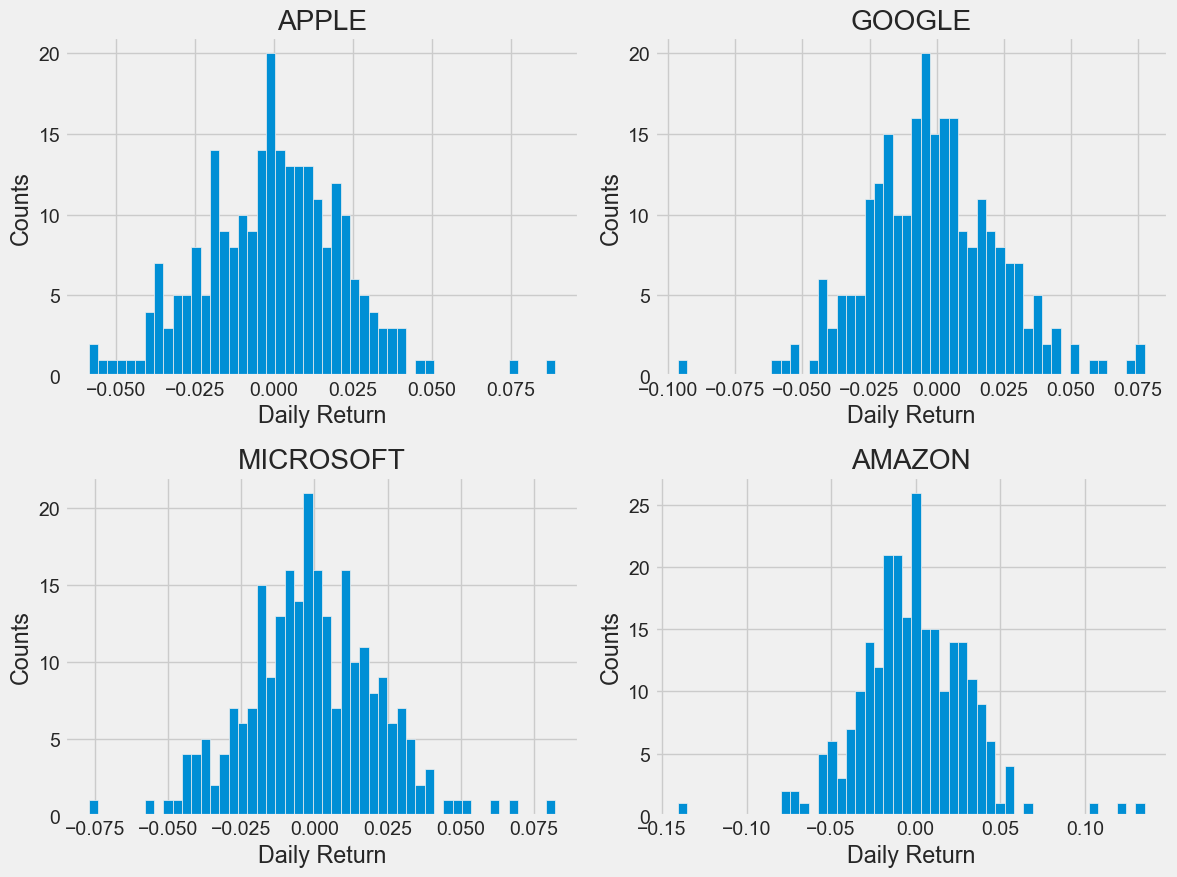

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']



[*********************100%%**********************]  4 of 4 completed


In [11]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-01-31,173.033218,149.573502,135.698502,306.005096
2022-02-01,172.864944,151.193497,137.878494,303.820648
2022-02-02,174.082642,150.612503,148.036499,308.445435
2022-02-03,171.172012,138.845505,142.650497,296.430756
2022-02-04,170.884567,157.639496,143.016006,301.045715


In [12]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-01-31,NaN,NaN,NaN,NaN
2022-02-01,-0.000972,0.010831,0.016065,-0.007139
2022-02-02,0.007044,-0.003843,0.073674,0.015222
2022-02-03,-0.016720,-0.078128,-0.036383,-0.038952
2022-02-04,-0.001679,0.135359,0.002562,0.015568


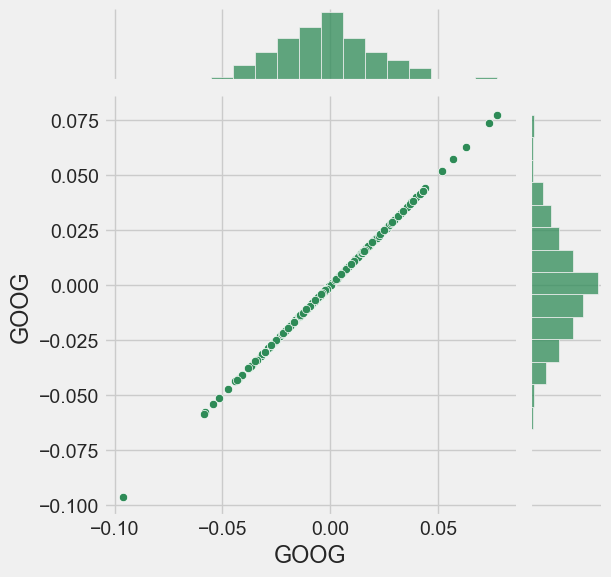

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

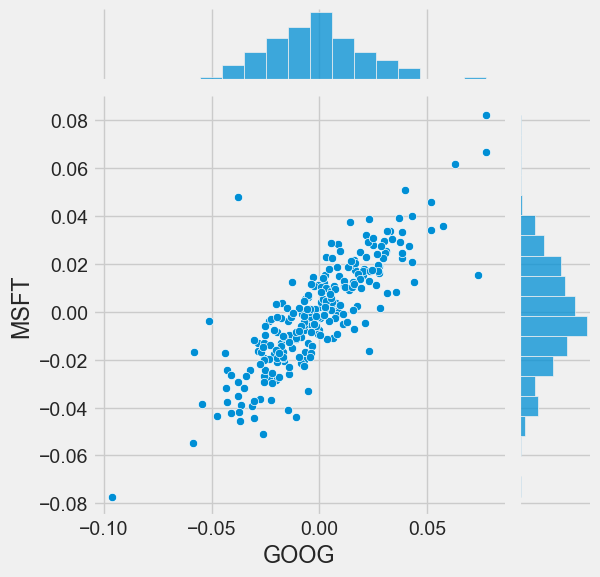

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

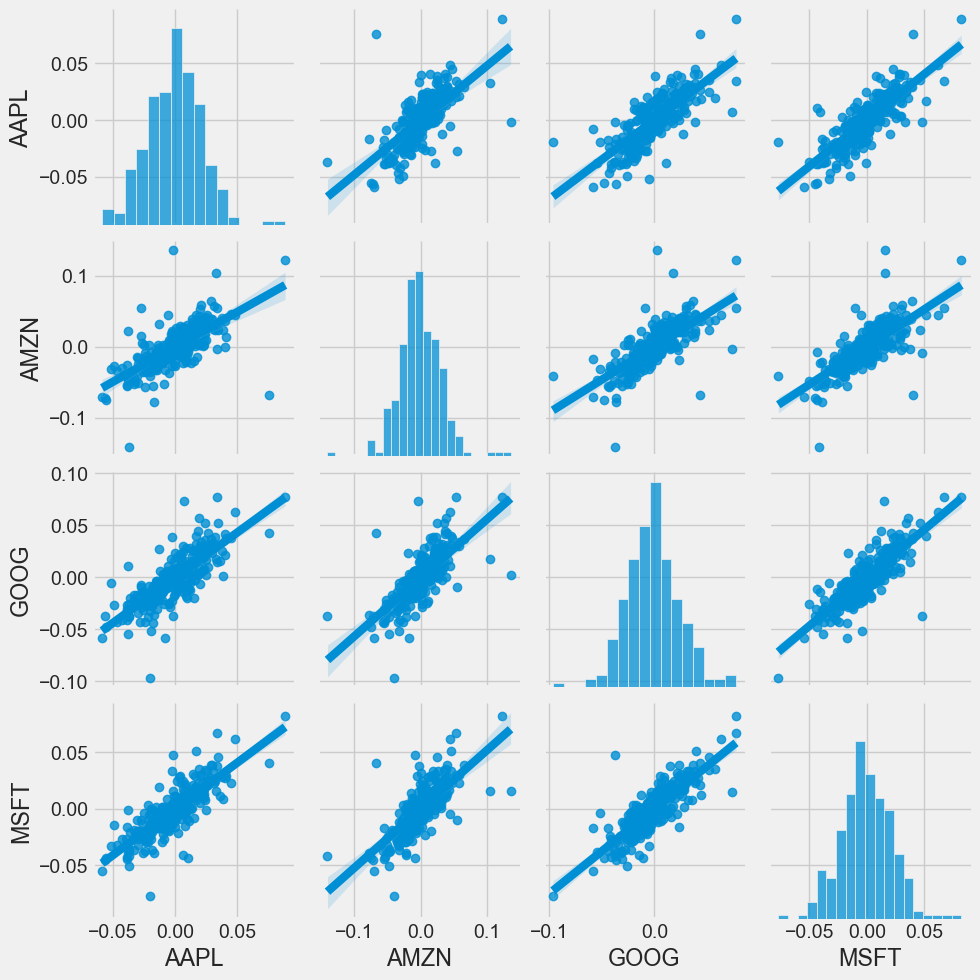

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

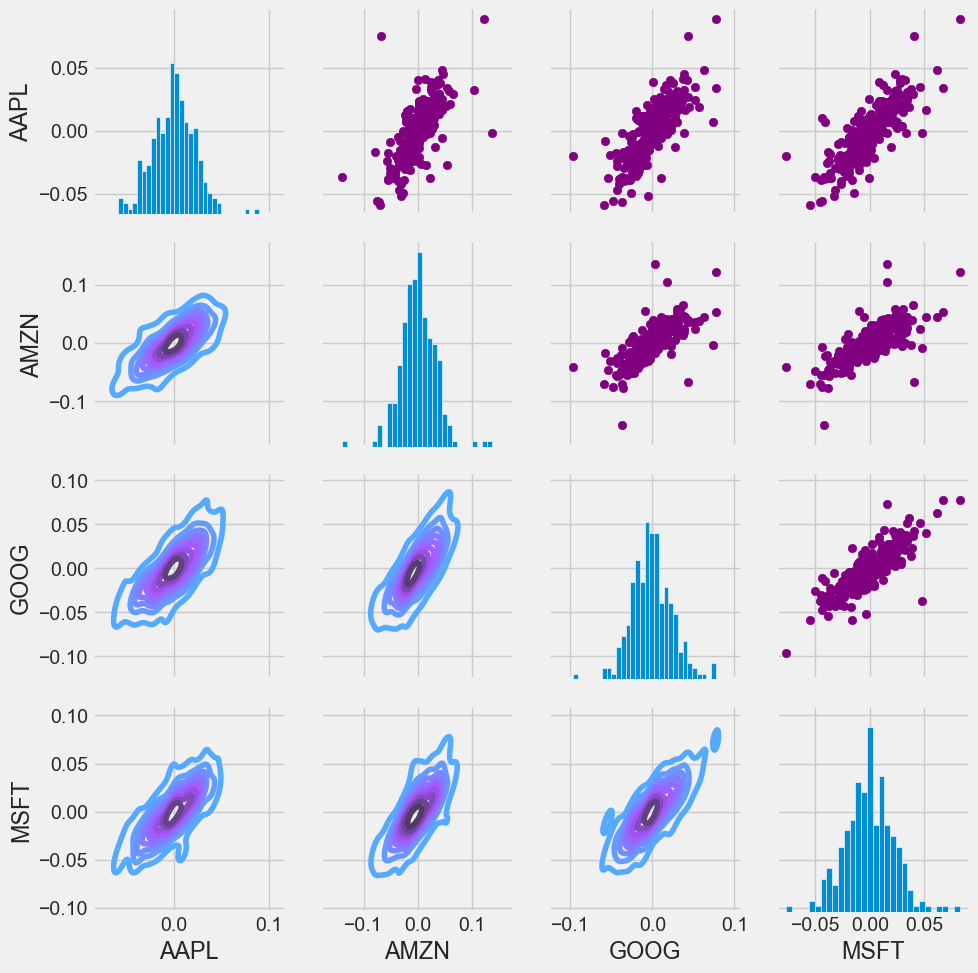

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

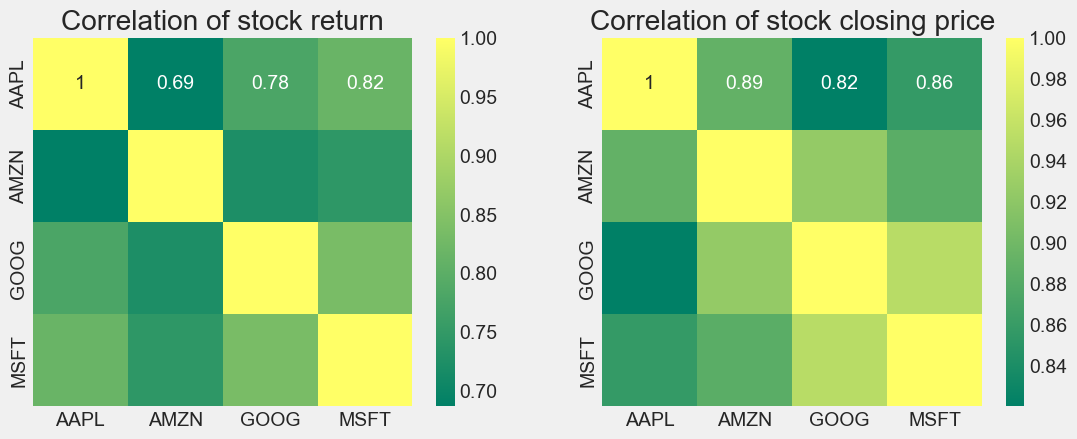

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

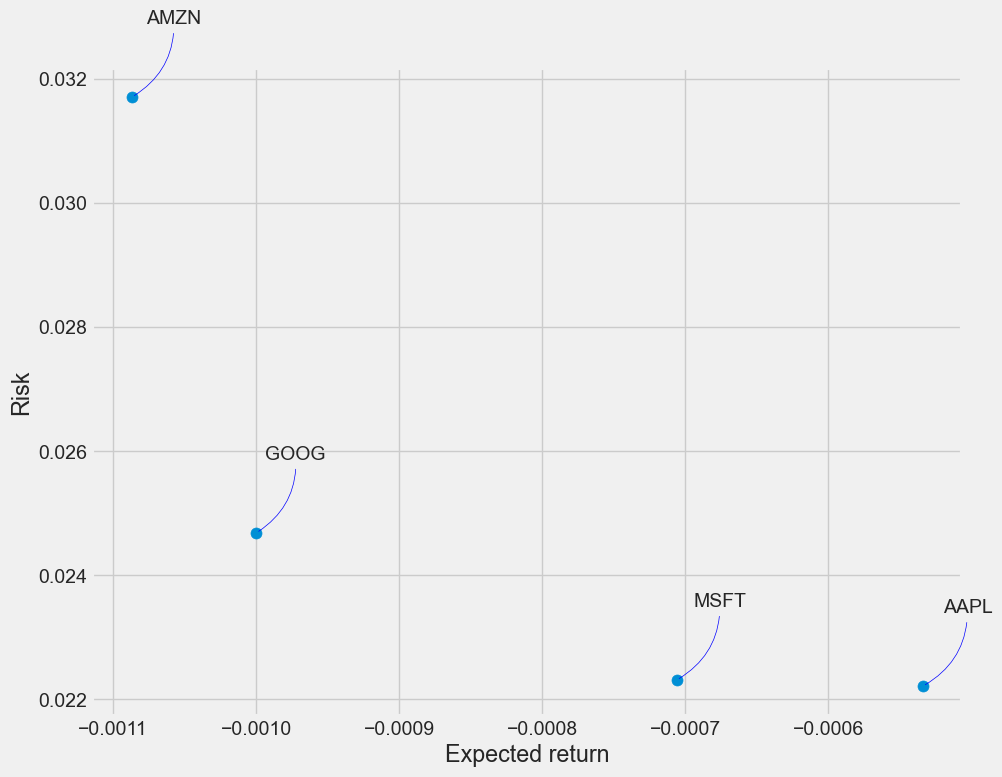

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=end)
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466093,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533084,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672227,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784390,394024400
...,...,...,...,...,...,...
2023-01-24,140.309998,143.160004,140.300003,142.529999,141.924484,66435100
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.257339,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.348419,54105100


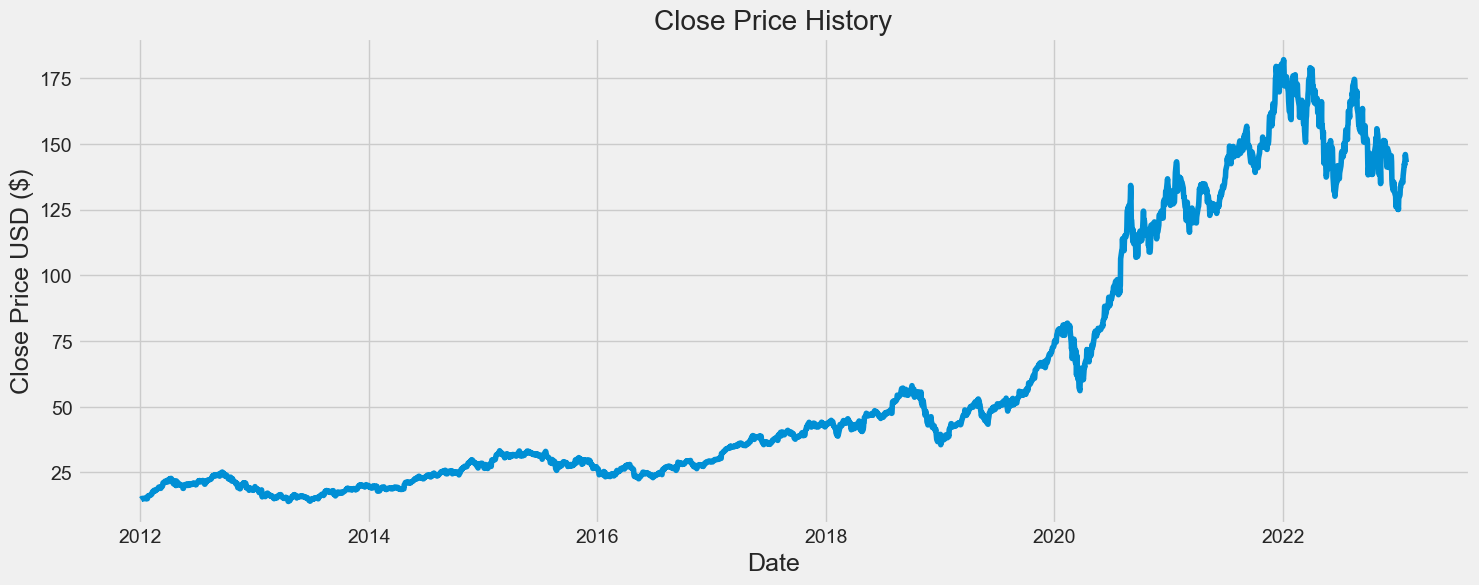

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2648

In [26]:
# 归一化
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
print(scaled_data.shape)

(2787, 1)


In [34]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
print(train_data.shape)
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    # print(i,len(x_train),len(y_train))
    # if i<= 61:
    #     print(x_train)
    #     print(y_train)
    #     print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape,y_train.shape)
# print(x_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape,y_train.shape)
# print(x_train)
# x_train.shape

(2648, 1)
(2588, 60) (2588,)
(2588, 60, 1) (2588,)


In [76]:

from tensorflow.keras import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



AlreadyExistsError: Another metric with the same name already exists.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)